# yahoo_finance 

This module allows basic, low-level access to Yahoo Finance data (stock prices, dividends and splits). Simply start with

In [3]:
import yahoo_finance
yahoo_finance.pandas.options.display.max_rows = 10

## Basic Usage

You can download **stock quotes** with

In [5]:
quotes = yahoo_finance.download_quotes("GILD")
print(quotes)

                 GILD
Date                 
1992-01-22   0.554329
1992-01-23   0.602234
1992-01-24   0.609078
1992-01-27   0.656983
1992-01-28   0.643296
...               ...
2020-02-26  74.699997
2020-02-27  72.660004
2020-02-28  69.360001
2020-03-02  75.400002
2020-03-03  74.209999

[7081 rows x 1 columns]


By default this will download all the available price data (with a daily interval). However, you can **change the interval and the time range:**

In [6]:
import datetime

start = datetime.date(2014, 1, 1)
weekly_data = yahoo_finance.download_quotes("GILD", start_date=start, interval=yahoo_finance.WEEKLY)

print(weekly_data)

                 GILD
Date                 
2013-12-30  65.102592
2014-01-06  65.584404
2014-01-13  68.676590
2014-01-20  70.621262
2014-01-27  70.647537
...               ...
2020-02-10  67.559998
2020-02-17  69.699997
2020-02-24  69.360001
2020-03-02  74.209999
2020-03-03  74.209999

[324 rows x 1 columns]


You can also download the **dividends** with

In [8]:
dividends = yahoo_finance.download_dividends("GILD")
print(dividends[0])

            Dividends
Date                 
2016-09-14       0.47
2015-06-12       0.43
2017-09-14       0.52
2018-09-13       0.57
2019-09-12       0.63
...               ...
2018-12-13       0.57
2019-06-13       0.63
2019-12-12       0.63
2016-03-14       0.43
2017-03-14       0.52

[19 rows x 1 columns]


You can specify a time range for the dividends, too, using <code>start_date</code> and <code>end_date</code>.

## Download multiple Tickers

You can also download multiple quotes in one call. <code>yahoo_finance</code> will automatically synchronize the price data:

In [9]:
quotes = yahoo_finance.download_quotes(["GILD", "IBM"])
print(quotes)

                 GILD         IBM
Date                             
1992-01-22   0.554329    8.823619
1992-01-23   0.602234    8.627538
1992-01-24   0.609078    8.592934
1992-01-27   0.656983    8.650600
1992-01-28   0.643296    8.604467
...               ...         ...
2020-02-26  74.699997  139.750000
2020-02-27  72.660004  133.110001
2020-02-28  69.360001  130.149994
2020-03-02  75.400002  134.300003
2020-03-03  74.209999  128.899994

[7081 rows x 2 columns]


/Users/jan-christopher/yahoo_finance/yahoo_finance.py:202: UserWarning: Coverage treshold hit: resulting coverage is 55.95%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))


## Getting Ready-To-Use Return Vectors

This module also allow quick access to synchronized return vectors (often required for further data manipulation): 

In [10]:
universe = ["ADS.DE", "SAP.DE", "BAS.DE", "VOW3.DE", "CON.DE"]

# download price data
price_data = yahoo_finance.download_quotes(universe)

# synchronize price data
# and calculate return vector
return_vector = price_data.pct_change().dropna()
print (return_vector)

              ADS.DE    SAP.DE    BAS.DE   VOW3.DE    CON.DE
Date                                                        
1998-07-23 -0.002138 -0.007689 -0.027702 -0.044056 -0.003390
1998-07-24 -0.098574 -0.007960 -0.009302 -0.004121 -0.025512
1998-07-27 -0.049128 -0.051740 -0.021712 -0.028917  0.011344
1998-07-28  0.023748  0.017874 -0.007082 -0.023836  0.075066
1998-07-29  0.037849  0.014788 -0.026700  0.024418 -0.024880
...              ...       ...       ...       ...       ...
2020-02-25 -0.001509 -0.016166 -0.019411 -0.010828 -0.036286
2020-02-26 -0.008124 -0.004359 -0.002952  0.002318  0.015833
2020-02-27 -0.020381 -0.027114 -0.027517 -0.043942 -0.025851
2020-02-28 -0.025666 -0.034447 -0.049427 -0.001613 -0.008585
2020-03-04  0.010976  0.011832  0.023926  0.044286 -0.021551

[5481 rows x 5 columns]


If the resulting price data is much smaller than the original dataset a warning will be raised:

In [11]:
universe = ["SAP.DE", "UN01.DE", "BAS.DE"]
# UN01.DE is Uniper SE, a recent spin-off

price_data = yahoo_finance.download_quotes(universe)

/Users/jan-christopher/yahoo_finance/yahoo_finance.py:202: UserWarning: Coverage treshold hit: resulting coverage is 14.76%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))


By default the coverage treshold is 90% but can be changed with <code>yahoo_finance.COVERAGE_TRESHOLD</code>.

## Usage Example

### Simple Charting

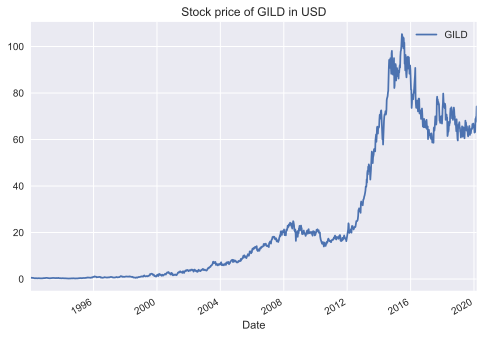

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

quotes = yahoo_finance.download_quotes("GILD", interval=yahoo_finance.WEEKLY)

quotes.plot(title="Stock price of GILD in USD")


In [13]:
dividends = yahoo_finance.download_dividends("ALV.DE")[0]

plt.bar([payout["Date"] for payout in dividends], [payout["Dividends"] for payout in dividends], width=100)
plt.title("Allianz SE. dividends in EUR")


TypeError: string indices must be integers

### Get Correlations of certain Stock Universe

/Users/jan-christopher/yahoo_finance/yahoo_finance.py:202: UserWarning: Coverage treshold hit: resulting coverage is 37.89%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))


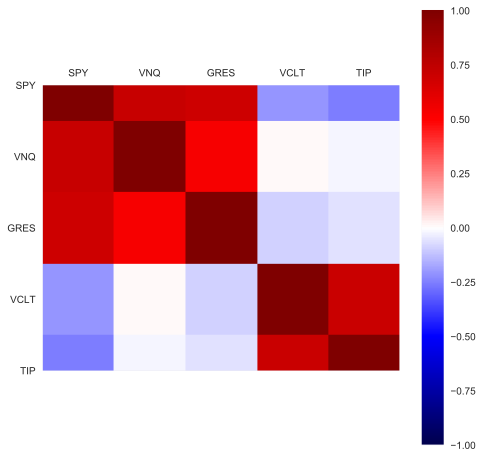

In [14]:
import yahoo_finance
import numpy

universe = ["SPY", "VNQ", "GRES", "VCLT", "TIP"] 
# SP500, REIT, Global Resources, Corp Debt, LT Gov Debt, ST Gov Debt

# get data
price_data = yahoo_finance.download_quotes(universe)
return_vector = price_data.pct_change().dropna()

# calculate corr coef
correlations =return_vector.corr()

# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap="seismic")
fig.colorbar(cax)
ticks = numpy.arange(0, correlations.shape[0], 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(universe)
ax.set_yticklabels(universe)
ax.grid(False)